4.10.0


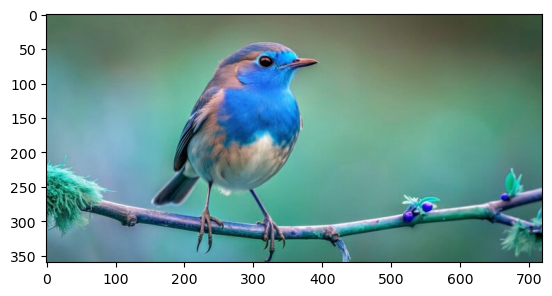

In [8]:
import cv2
print(cv2.__version__)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('img1.jpg')
# Display the image
plt.imshow(img)
plt.show()

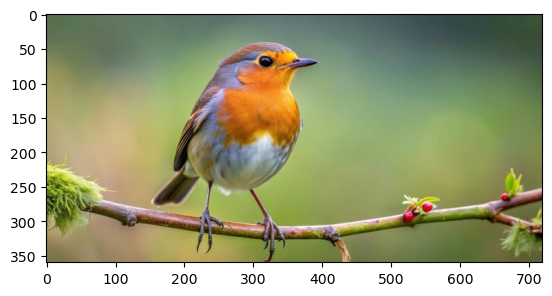

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

* 1. Modify brightness of the image performing appropriate operation
 

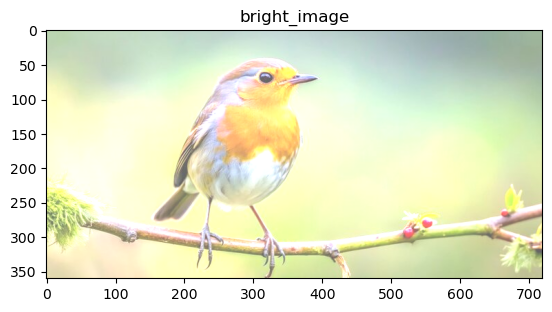

In [10]:

brightness_increase = 100
bright_image = cv2.convertScaleAbs(img, alpha=1, beta=brightness_increase)
plt.imshow(bright_image)
plt.title("bright_image")
plt.show()

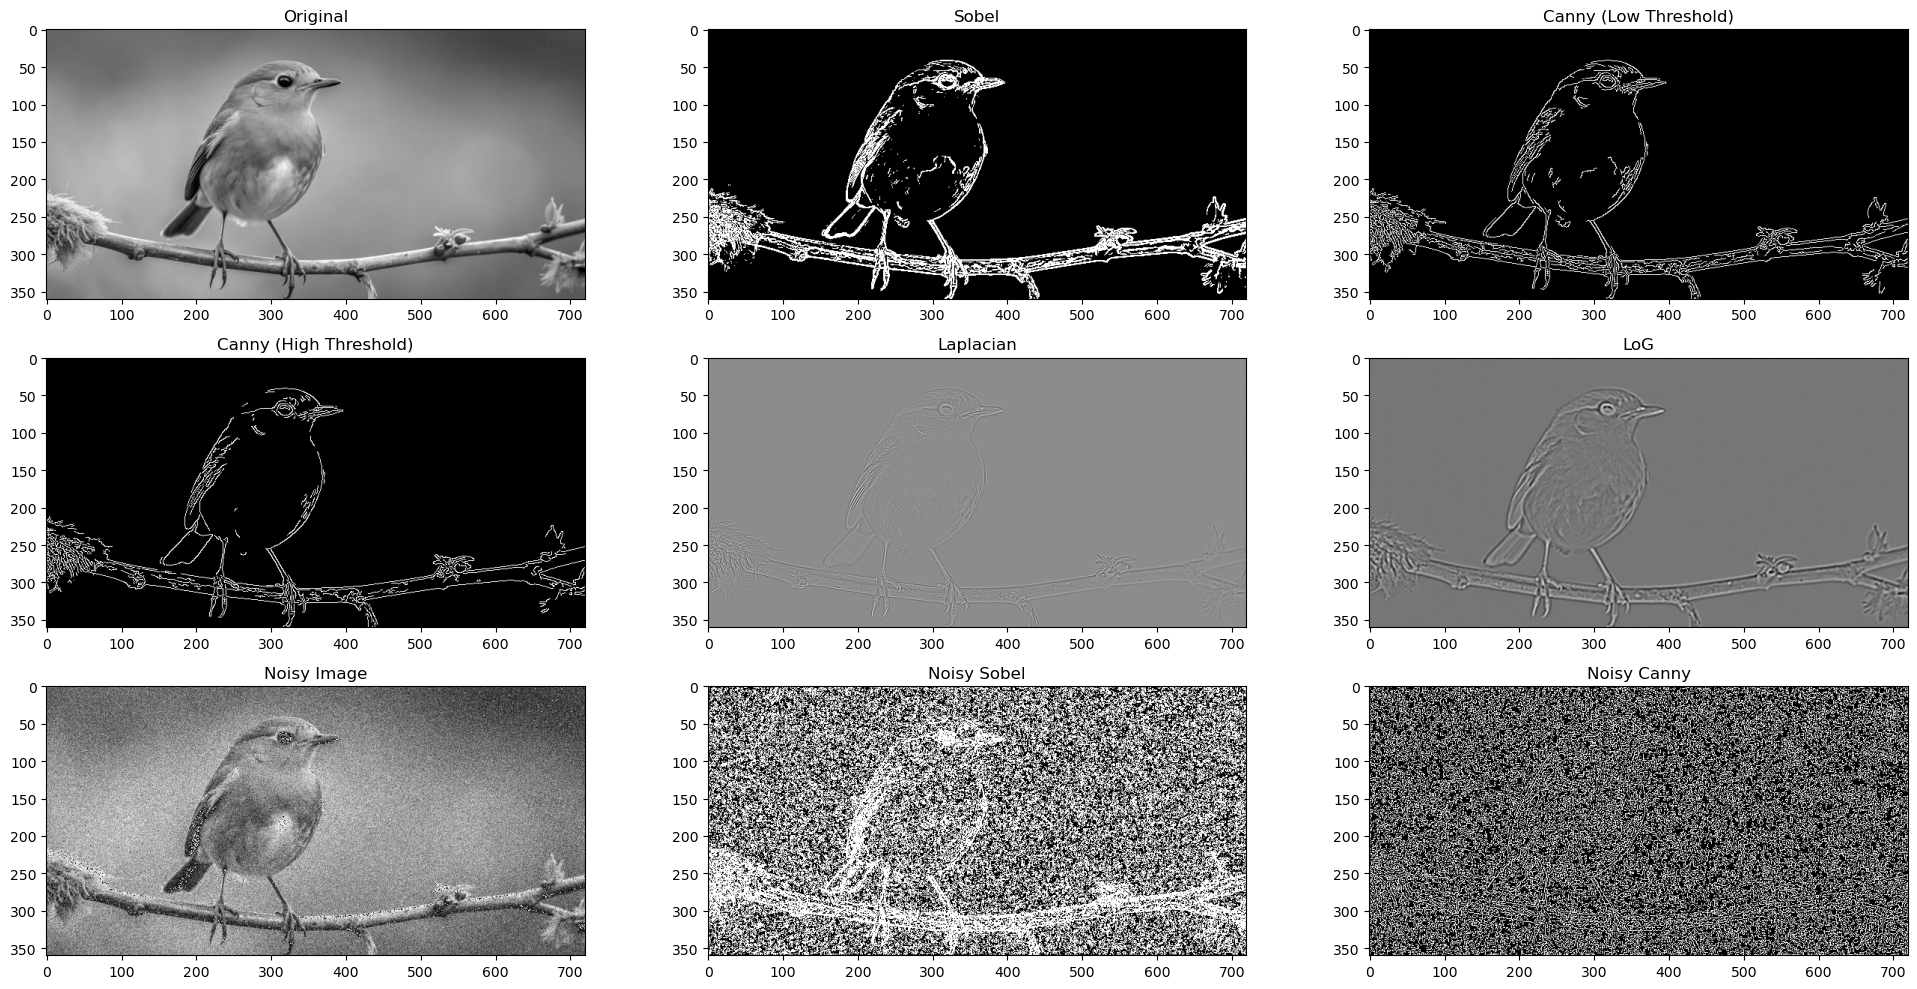

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edges(image, threshold=100):
    # Compute gradients using Sobel filters
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine gradients
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Threshold
    edges = (magnitude > threshold).astype(np.uint8) * 255
    
    return edges

def canny_edges(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

def laplacian_edges(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def log_edges(image, kernel_size=5, sigma=1.4):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Compute Laplacian
    return cv2.Laplacian(blurred, cv2.CV_64F)

# Load image
image = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel edges
sobel = sobel_edges(image, threshold=100)

# Canny edges
canny_low = canny_edges(image, 100, 200)
canny_high = canny_edges(image, 150, 250)

# Laplacian edges
laplacian = laplacian_edges(image)

# LoG edges
log = log_edges(image)

# Add noise to image
noisy = image + np.random.normal(0, 25, image.shape).astype(np.uint8)

# Apply edge detection to noisy image
noisy_sobel = sobel_edges(noisy, threshold=100)
noisy_canny = canny_edges(noisy, 100, 200)
noisy_log = log_edges(noisy)

# Display results
plt.figure(figsize=(20, 10))

plt.subplot(331), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(332), plt.imshow(sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(333), plt.imshow(canny_low, cmap='gray'), plt.title('Canny (Low Threshold)')
plt.subplot(334), plt.imshow(canny_high, cmap='gray'), plt.title('Canny (High Threshold)')
plt.subplot(335), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(336), plt.imshow(log, cmap='gray'), plt.title('LoG')
plt.subplot(337), plt.imshow(noisy, cmap='gray'), plt.title('Noisy Image')
plt.subplot(338), plt.imshow(noisy_sobel, cmap='gray'), plt.title('Noisy Sobel')
plt.subplot(339), plt.imshow(noisy_canny, cmap='gray'), plt.title('Noisy Canny')

plt.tight_layout()
plt.show()


* 2.modify the conrtrast of the image using various filter and compare their result
* 3.Remove noise from the image using linear filter

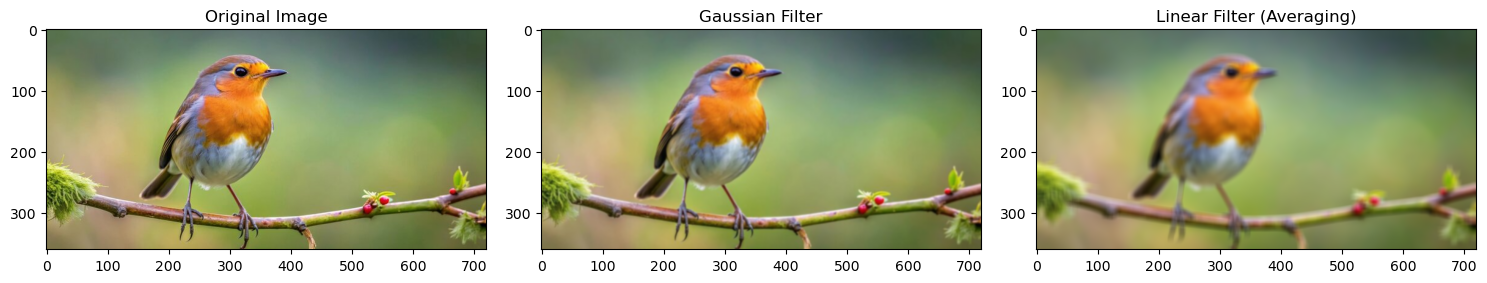

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# linear filter (Averaging)
kernel_size = 10
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
linear_filtered = cv2.filter2D(img, -1, kernel)

# Gaussian filter
sigma = 1.0
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), sigma)

# Plots
plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(img), plt.title('Original Image')
plt.subplot(133), plt.imshow(linear_filtered), plt.title('Linear Filter (Averaging)')
plt.subplot(132), plt.imshow(gaussian_filtered), plt.title('Gaussian Filter')

plt.tight_layout()
plt.show()


* 4. Remove noise from the image using non-linear filter
 

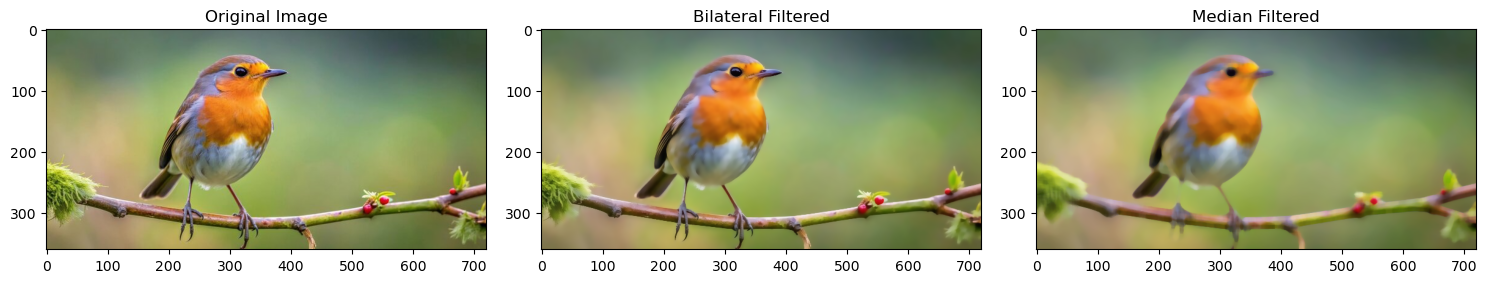

In [71]:
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Bilateral filtering
bilateral_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Median Filter
median_filtered = cv2.medianBlur(img, 11) # Kernel size should be odd

# Results
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Bilateral Filtered')
plt.subplot(133), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.tight_layout()
plt.show()


* 4. Identity the edge in the image using appropriate filter

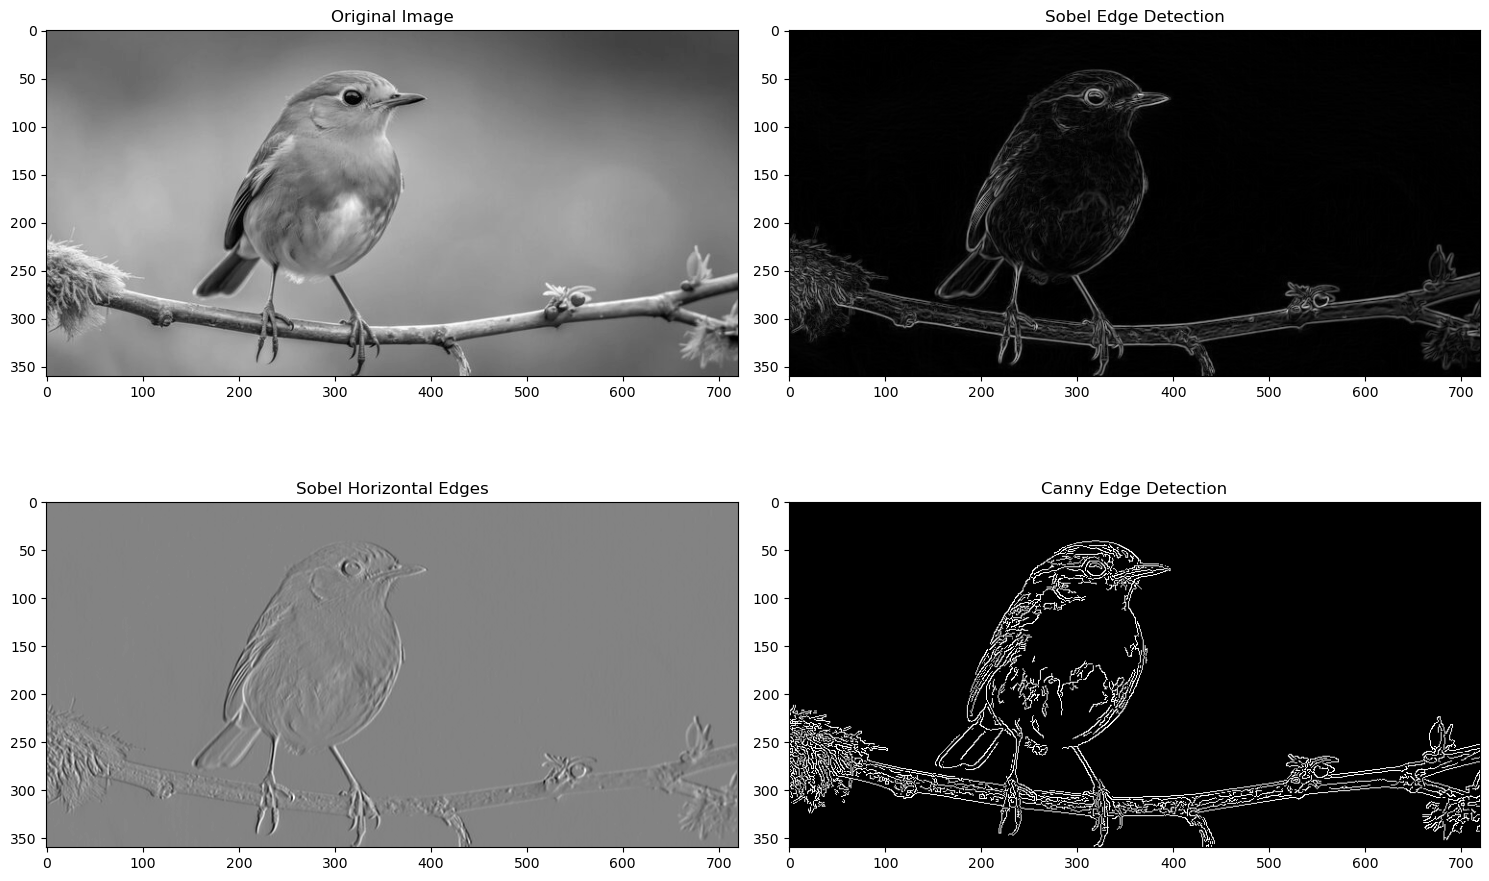

In [77]:
import cv2
import matplotlib.pyplot as plt

# Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobel_x, sobel_y)     # Combine both directions

# Canny Edge Detection
canny_edges = cv2.Canny(img, threshold1=50, threshold2=150)

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Edge Detection')
plt.subplot(223), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel Horizontal Edges')
plt.subplot(224), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()
